# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing

# Load the data
df = load_data("data/clinical_trial_raw.csv")
print(f"Loaded {len(df)} patients")


# Prewritten visualization function for missing data
def visualize_missing_data(
    missing_counts, title="Missing Values per Column", figsize=(10, 5)
):
    plt.figure(figsize=figsize)
    missing_counts.plot(kind="bar", color="lightpink")  # 🎨 default to light pink bars
    plt.title(title)
    plt.ylabel("Count of Missing Values")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

Missing Value Counts:
patient_id               0
age                      0
sex                      0
bmi                    438
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
dtype: int64

Missing Value Percentages:
patient_id             0.00
age                    0.00
sex                    0.00
bmi                    4.38
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
outcome_cvd            0.00
adh

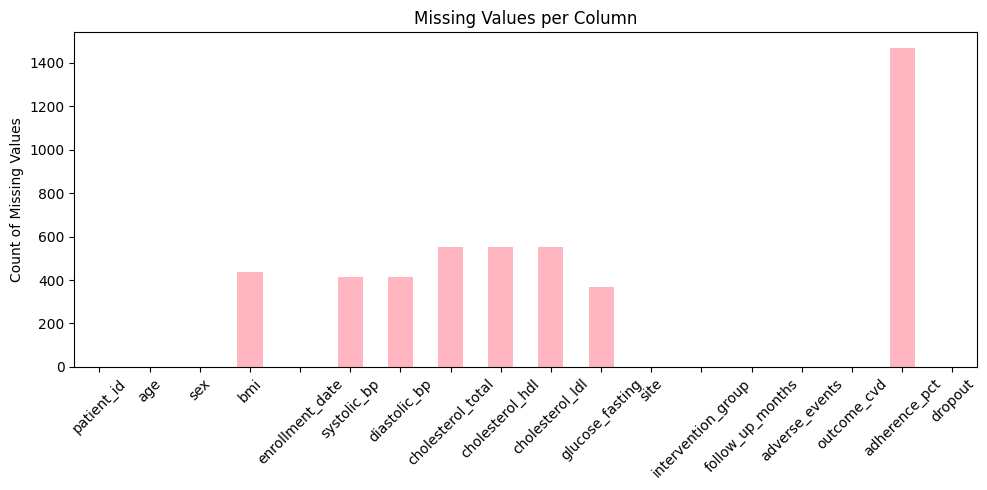

In [11]:
# TODO: Detect and analyze missing data
# 1. Use detect_missing(df) to get missing value counts
# 2. Calculate percentage of missing values per column
# 3. Print both counts and percentages
# 4. Identify which columns have missing data

# Optional: Use the visualization function above to create a bar chart
# visualize_missing_data(missing_counts)
missing_counts = detect_missing(df)
print("Missing Value Counts:")
print(missing_counts)

missing_percent = (missing_counts / len(df)) * 100
print("\nMissing Value Percentages:")
print(missing_percent.round(2))

missing_columns = missing_counts[missing_counts > 0].index.tolist()
print(f"\nColumns with Missing Data: {missing_columns}")

visualize_missing_data(missing_counts)

## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [15]:
# TODO: Compare imputation strategies
fill_mean = fill_missing(df, "cholesterol_total", strategy="mean")
fill_median = fill_missing(df, "cholesterol_total", strategy="median")

forward_fill = df.copy()
forward_fill["cholesterol_total"] = forward_fill["cholesterol_total"].fillna(
    method="ffill"
)

original_missing = df["cholesterol_total"].isna().sum()

table = pd.DataFrame(
    {
        "Strategy": ["Original", "Mean", "Median", "Forward Fill"],
        "Mean": [
            df["cholesterol_total"].mean(),
            fill_mean["cholesterol_total"].mean(),
            fill_median["cholesterol_total"].mean(),
            forward_fill["cholesterol_total"].mean(),
        ],
        "Median": [
            df["cholesterol_total"].median(),
            fill_mean["cholesterol_total"].median(),
            fill_median["cholesterol_total"].median(),
            forward_fill["cholesterol_total"].median(),
        ],
        "Values Filled": [
            0,
            original_missing - fill_mean["cholesterol_total"].isna().sum(),
            original_missing - fill_median["cholesterol_total"].isna().sum(),
            original_missing - forward_fill["cholesterol_total"].isna().sum(),
        ],
    }
)

display(table.round(2))

/var/folders/5w/6rlwfykx6274ngzhynds5b_h0000gn/T/ipykernel_9898/1993459403.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_fill["cholesterol_total"] = forward_fill["cholesterol_total"].fillna(


,Strategy,Mean,Median,Values Filled
0,Original,178.04,177.00,0
1,Mean,178.04,178.04,554
2,Median,177.98,177.00,554
3,Forward Fill,178.07,177.00,554


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [13]:
# TODO: Drop missing rows with different strategies
drop_any = df.dropna()
print(f"Rows Remaining After Dropping ANY Missing Values: {len(drop_any)}")

drop_specific = df.dropna(subset=["age", "bmi"])
print(
    f"Rows Remaining After Dropping Rows Missing 'age' Or 'bmi': {len(drop_specific)}"
)

rows_lost_any = len(df) - len(drop_any)
rows_lost_specific = len(df) - len(drop_specific)

print(f"\nRows Lost (Any Missing): {rows_lost_any}")
print(f"Rows Lost (Missing Only 'age' Or 'bmi'): {rows_lost_specific}")

if rows_lost_specific < rows_lost_any:
    print("\nDropping Specific Columns Loses Less Data!")
else:
    print("\nDropping Any Missing Data Loses Less Data (Unexpected But Possible)")


Rows Remaining After Dropping ANY Missing Values: 7133
Rows Remaining After Dropping Rows Missing 'age' Or 'bmi': 9562

Rows Lost (Any Missing): 2867
Rows Lost (Missing Only 'age' Or 'bmi'): 438

Dropping Specific Columns Loses Less Data!


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [21]:
# TODO: Create and save clean dataset
# Make a copy to preserve original df
df_clean = df.copy()

# Track original number of rows
original_rows = len(df_clean)

# Drop rows with missing critical numeric values
df_clean = df_clean.dropna(subset=["patient_id", "age"])
after_critical = len(df_clean)
dropped_critical = original_rows - after_critical
print(
    f"Dropped {dropped_critical} rows with missing critical values (patient_id, age)."
)

# Impute numeric columns (mean or median)
df_clean = fill_missing(df_clean, "bmi", strategy="median")
df_clean = fill_missing(df_clean, "systolic_bp", strategy="median")
df_clean = fill_missing(df_clean, "diastolic_bp", strategy="median")
df_clean = fill_missing(df_clean, "cholesterol_total", strategy="median")
df_clean = fill_missing(df_clean, "cholesterol_hdl", strategy="median")
df_clean = fill_missing(df_clean, "cholesterol_ldl", strategy="median")
df_clean = fill_missing(df_clean, "glucose_fasting", strategy="median")
df_clean = fill_missing(df_clean, "adherence_pct", strategy="median")

# Clean 'site' column
df_clean["site"] = (
    df_clean["site"]
    .astype("string")
    .str.strip()
    .str.replace("_", " ")
    .str.replace(r"\s+", " ", regex=True)
    .str.lower()
)

# Clean 'intervention_group' column
df_clean["intervention_group"] = (
    df_clean["intervention_group"]
    .astype("string")
    .str.strip()
    .str.replace("_", " ")
    .str.replace(r"\s+", " ", regex=True)
    .str.lower()
    .str.replace("contrl", "control")
    .str.replace("treatmen a", "treatment a")
    .str.replace("treatmenta", "treatment a")
)

# Save cleaned data and missing data report
df_clean.to_csv("output/q5_cleaned_data.csv", index=False)
df_clean.isna().sum().to_csv("output/q5_missing_report.txt", header=["MissingCount"])

# Summary
final_rows = len(df_clean)
print(f"Rows before cleaning: {original_rows}")
print(f"Rows after cleaning:  {final_rows}")
print(f"Total rows dropped:   {original_rows - final_rows}")
print("Cleaned dataset saved to: output/q5_cleaned_data.csv")
print("Missing data report saved to: output/q5_missing_report.txt")

Dropped 0 rows with missing critical values (patient_id, age).
Rows before cleaning: 10000
Rows after cleaning:  10000
Total rows dropped:   0
Cleaned dataset saved to: output/q5_cleaned_data.csv
Missing data report saved to: output/q5_missing_report.txt


## Reflection

Which imputation strategy would you recommend for this dataset and why?

I recommend using median imputation because it’s less affected by outliers and gives a more accurate representation of typical patient values. This makes it well-suited for clinical data where variables like cholesterol or BMI can vary widely across individuals.